## Introducción a la Visión Computacional

> Fabián Ortega Vega

## Tarea 1
-----------------------


3. Hacer pre-procesamiento simple:
    + Implementar un código que realice en forma masiva un cambio de resolución de las imágenes (por ejemplo unas 100 a una resolución menor, por ejemplo, 256x256 o 512x512). Para ello, las imágenes fuente deben estar en un directorio y las de salida en uno diferente.
    + Implementar un código que filtre (por ejemplo, gaussiano) las imágenes y las deje en un nuevo directorio.




1. El dataset a utilizar es una base de datos llamada 'FIRE Dataset' (https://www.kaggle.com/datasets/phylake1337/fire-dataset). El objeto de estudio de las fotografías es la presencia de fuego. El dataset contiene un total de 999 imagenes divididas en 755 imagenes con presencia de fuego, y 244 imagenes en donde no hay fuego. Las fotografías fueron tomadas al aire libre y fueron obtenidas para un desafío de la NASA. 

2. Una aplicación interesante para el conjunto de imágenes, puede ser el diseño de un modelo de clasificación que detecte de manera prescisa la presencia de focos de incendio, ya sea en lugares habitados, no habitados o en incendios forestales. Esto se puede hacer a través del análisis de video en tiempo real, imágenes satelitales, etc. Y permitiria no solo identificar incendios, si no también la verificación ante alguna alerta, el seguimiento y evolución de un incendio, o generar sistemas de notificación de incendios forestales. 


# 3. Preprocesamiento

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from pathlib import Path
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Procesando las imagenes

In [3]:
dir_ = Path('fire_dataset')
png_filepaths = list(dir_.glob(r'**/*.png'))

obtengo etiquetas (fire_images y non_fire_images) para crear un dataframe con el path de la imagen y su etiqueta

In [5]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], png_filepaths))

In [8]:
filepaths = pd.Series(png_filepaths, name = 'File').astype(str)
labels = pd.Series(labels, name = 'Label')

# Uno rutas con etiquetas
df = pd.concat([filepaths, labels], axis=1)

df['Label'].replace({"non_fire_images":"nofire","fire_images":"fire"}, inplace=True)

In [10]:
df.head()

,File,Label
0,fire_dataset\fire_images\fire.122.png,fire
1,fire_dataset\fire_images\fire.123.png,fire
2,fire_dataset\fire_images\fire.124.png,fire
3,fire_dataset\fire_images\fire.125.png,fire
4,fire_dataset\fire_images\fire.126.png,fire


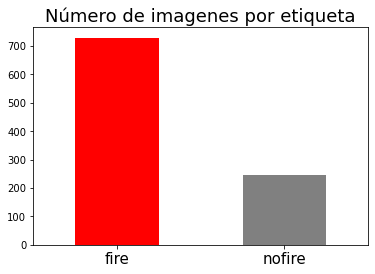

In [13]:
df['Label'].value_counts().plot.bar(color = ['red','gray'])
plt.title('Número de imagenes por etiqueta', fontsize = 18)
plt.xticks(rotation = 0, fontsize = 15) 
plt.show()

## Algunas imágenes del dataset

Se puede ver que algunas imagenes tienen distinto tamaño

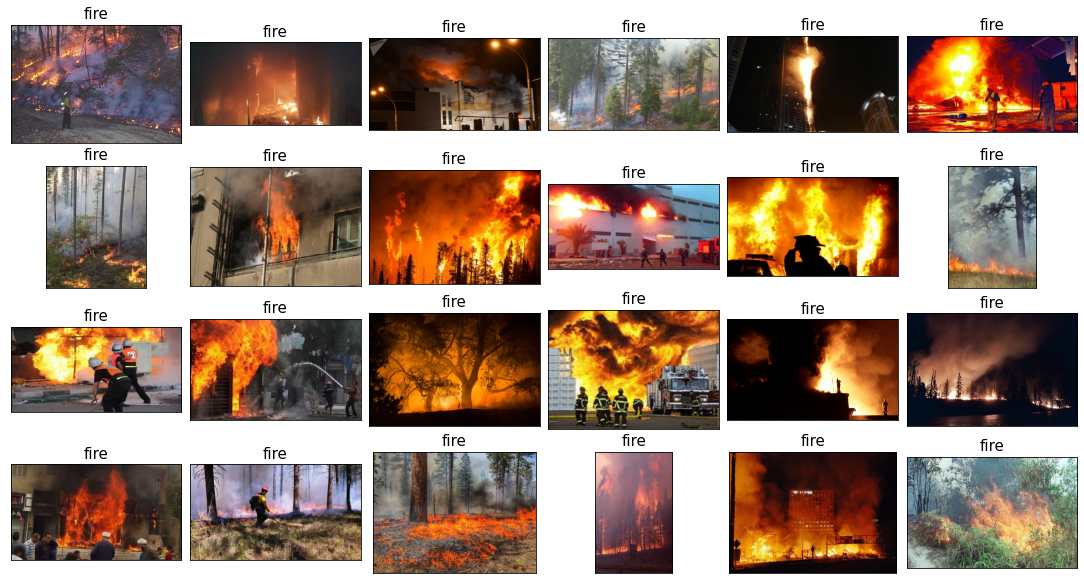

In [15]:

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(15, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = image.load_img(df['File'].iloc[i])
    ax.imshow(img, cmap = 'gray')
    title = df['Label'].iloc[i]
    ax.set_title(title, fontsize = 15)
plt.tight_layout(pad=0.5)
plt.show()

# Resize de las imagenes

In [18]:
images = np.empty(len(df.File), dtype=object)

for n in range(0, len(df.File)):
 
    path = df.File[n]
    images[n] = cv2.imread(df.File[n],
                           cv2.IMREAD_UNCHANGED)
 
    # Load the image in img variable
    img = cv2.imread(path, 1)
 
    # Define a resizing Scale
    # To declare how much to resize
    #resize_scaling = 50
    #resize_width = int(img.shape[1] * resize_scaling/100)
    #resize_hieght = int(img.shape[0] * resize_scaling/100)
    #resized_dimensions = (resize_width, resize_hieght)
 
    # Create resized image using the calculated dimensions
    resized_image = cv2.resize(img, dsize=(250,250),
                               interpolation=cv2.INTER_AREA)
 
    # Save the image in Output Folder
    cv2.imwrite(
      'output/' + df.Label[n] + str(n) + '_resized.png', resized_image)

KeyboardInterrupt: 